In [49]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import scipy
from scipy.optimize import curve_fit
import matplotlib.colors as colors
from numpy import polyfit, poly1d

In [50]:
def DILILA(t,t_len, dinit,gapinit,gapcrit,gapfin,dcrit,dfin,tinflect):
    numstep1 = gapinit* dcrit* t + gapcrit* dinit*(tinflect -t)
    denomsteps1 = gapinit* t + gapcrit * (tinflect - t)
    numstep2 = gapfin* dcrit*(t_len - t ) + gapcrit* dfin*(t-tinflect)
    denomsteps2 = gapfin*(t_len -t) +gapcrit*(t-tinflect)
    if t>t_len:
        out = dfin
    elif t>tinflect:
        out = numstep2/denomsteps2
    else:
        out = numstep1/denomsteps1
    return out
def Deltafunc(time):
    t = time - Rabi_ramp_time
    if t<0:
        return dinit
    else:
        return DILILA(t,T_DiLILA, dinit,gapinit,gapcrit,gapfin,dcrit,dfin,tinflect)
def func_erf(x,x0,A,B):
    return (scipy.special.erf((x-x0)/B)+1)*A
def func_logistic(x,x0,A,B):
    return A/(1+np.exp(-(x-x0)/B))

8 sites ,fitted crit detuning(MHz)= 1.105 ,fitting error =  0.07


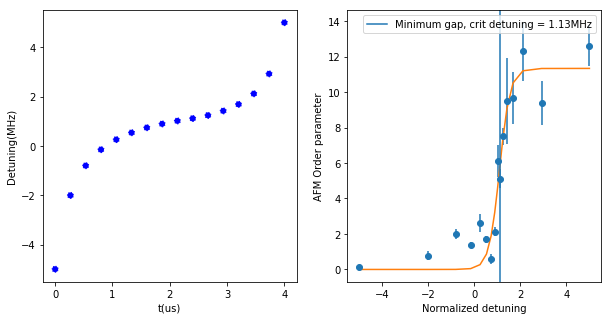

In [65]:
# 8 sites PBC

data_n = np.loadtxt('C:/msys64/home/wangy/experiment-control/matlab_new/analysis/scripts/1_12_23/data_n_8.csv',delimiter=',')
data_nn = np.loadtxt('C:/msys64/home/wangy/experiment-control/matlab_new/analysis/scripts/1_12_23/data_nn_8.csv',delimiter=',')
t = data_n[0]

N_t = len(t)
Nsites = int((len(data_n)-1)/2) 
n = (data_n[1:Nsites+1]).transpose() #(time,site i)
n_err = data_n[Nsites+1:].transpose()
nn = data_nn[0:N_t].reshape(N_t,Nsites,Nsites) # (time,site i, site j)
nn_err = data_nn[N_t:].reshape(N_t,Nsites,Nsites)
sign = np.ones(Nsites)
sign[0::2]=-1
sign_2D = np.outer(sign,sign)
T_DiLILA = 4
dinit = -5
gapinit = 5.17
gapcrit = 0.6614
gapfin = 3.68
dcrit = 1.13
dfin = 5
tinflect = 2.452
Rabi_ramp_time=0
det = []
fig, ax = plt.subplots(1, 2, figsize=(10,5))
for i in range(len(t)):
    det.append(Deltafunc(t[i]))
ax[0].scatter(t,det,linestyle = ':',color ='blue')
ax[0].set_ylabel('Detuning(MHz)')
ax[0].set_xlabel('t(us)')

order = []
order_err = [] 
for i in range(N_t):
    #print(i)
    temp = np.vdot(nn[i],sign_2D)
    err = np.vdot(nn_err[i],sign_2D)
    
    #print(temp)
    order.append(temp)
    order_err.append(err)

ax[1].errorbar(det,order,order_err,marker = 'o',ls = '')
p,perr = curve_fit(func_logistic,det,order,p0=[1.15,13,0.3])
print(8,'sites',',fitted crit detuning(MHz)=',np.round(p[0],3),',fitting error = ',np.round((np.diag(perr)**0.5)[0],3))

plt.plot(det,func_logistic(det,*p))

ax[1].set_ylabel('AFM Order parameter')
ax[1].set_xlabel('Normalized detuning')

ax[1].axvline(1.105,label = 'Minimum gap, crit detuning = 1.13MHz')

ax[1].legend()

0.8935943328193888
1.0150411578640253
1.1130556817013522


Text(0, 0.5, 'sigma field correlator')

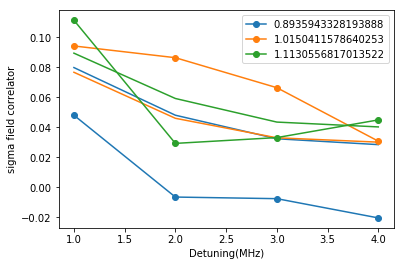

In [82]:
tsteps = len(n) # length of parameters
N = np.shape(n)[1] # system size 
sigma1 = np.zeros([tsteps, N]) 
sigma2 = np.zeros([tsteps, N])
sign = np.ones(N)
sign[0::2]=-1
sign_2D = np.outer(sign,sign)
x = np.arange(N)
alphalist = np.linspace(0,1,tsteps+1)
for it,t_i in enumerate(range(7,10,1)):
    print(det[t_i])
    average = np.mean(1-n,axis=1) # average rydberg population 
    for i in range(N):
        sigma1[t_i,i] = (-1)**i * (1-n[t_i,i])-average[t_i]
        temp = (nn[t_i]-average[t_i]**2)*sign_2D
        sigma2[t_i,i] = (np.trace(temp,i)+np.trace(temp,i-N))/N
    plt.plot(x[1:5],sigma2[t_i][1:5],label = det[t_i],color='C%d'%it,marker = 'o')
    plt.plot(x[1:5],y_sim[t_i],color ='C%d'%it)
plt.legend()
plt.xlabel('Detuning(MHz)')
plt.ylabel('sigma field correlator')
#plt.plot(x[1:5],0.1*(x[1:5])**(-0.25),color = 'black')
# plt.xscale('log')
# plt.yscale('log')

array([0.10438148, 0.07753828, 0.06107555, 0.05811638])

C:\Users\wangy\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


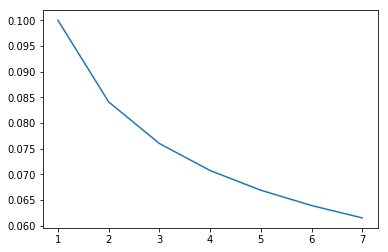

In [6]:
def power_law(x, a, b):
    return a * x**b
plt.plot(x,0.1*x**(-0.25))

In [7]:
N = 8
data = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/2_3_23/Overlap2023_02_03_12_24_51_L8_1',delimiter=',')
z0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/2_3_23/z_2023_02_03_12_24_51_L8_1',delimiter=',')
zz0 =  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/2_3_23/zz_2023_02_03_12_24_51_L8_1',delimiter=',')
zzdata = zz0.reshape(len(z0),N,N)
z0_g = np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/2_3_23/zg_2023_02_03_12_24_51_L8_1',delimiter=',')
zz0_g=  np.loadtxt('C:/Users/wangy/Rydberg simulation/rydberg_data/2_3_23/zzg_2023_02_03_12_24_51_L8_1',delimiter=',')
zzdata_g = zz0_g.reshape(len(z0_g),N,N)

(16,)

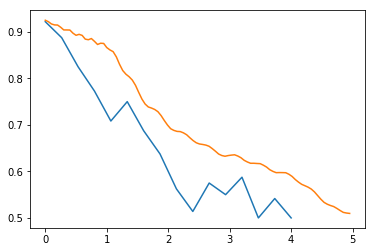

In [102]:
plt.plot(t,np.mean(n,axis = 1))
plt.plot(data[0],0.5-0.85*z0[:,i]*np.exp(-data[0]/10)/2,label='numerics')


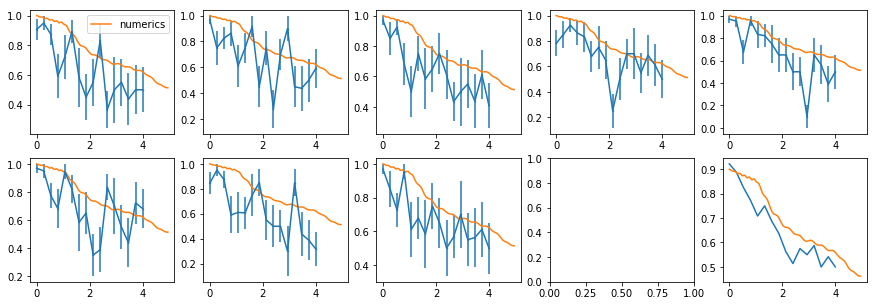

In [88]:
fig, ax = plt.subplots(2, 5, figsize=(15,5))
ms = 1
for i in range(Nsites):
    ax[i//5,i%5].errorbar(t,n[:,i],n_err[:,i],markersize = ms,marker='.')
    ax[i//5,i%5].plot(data[0],(1-(z0[:,i]*np.exp(-data[0]/15)+1)/2),label='numerics')
ax[0,0].legend()
ax[1,4].plot(t,np.mean(n,axis = 1))
ax[1,4].plot(data[0],(1-(z0[:,i]*np.exp(-data[0]/15)+1)/2),label='numerics')


In [57]:
sign = np.ones(N)
sign[0::2]=-1
sigma2_g = []
sigma_c_g = []
x = np.arange(N)
x = np.arange(N)
sigma_c = []
sigma2 = []
for t_id in range(len(data[0])):
    z_g = z0_g[t_id]
    zz_g = zz0_g[t_id].reshape(N,N)
    n_g = (1-z_g)/2
    n_g_mean = np.mean(n_g)
    sigma_g = (n_g[:]-n_g_mean)*sign
    nn_g = (np.ones((N,N))-z_g-z_g[:,np.newaxis]+zz_g)/4
    z = z0[t_id]
    zz = zz0[t_id].reshape(N,N)
    n = (1-z)/2
    n_mean = np.mean(n)
    sigma = (n[:]-n_mean)*sign
    nn = (np.ones((N,N))-z-z[:,np.newaxis]+zz)/4
    for i in x:
        temp_g = (-1)**i * (nn_g[0,i]-n_g_mean*n_g[0]-n_g_mean*n_g[i]+n_g_mean**2)
    
        sigma2_g.append(temp_g)
        sigma_c_g.append(temp_g-sigma_g[0]*sigma_g[i])
        temp =  (-1)**i * (nn[0,i]-n_mean*n[0]-n_mean*n[i]+n_mean**2)
        sigma2.append(temp)
        sigma_c.append(temp-sigma[0]*sigma[i])
sigma2_g = np.array(sigma2_g)
sigma2_g = sigma2_g.reshape(len(data[0]),N)
sigma2 = np.array(sigma2)
sigma2 = sigma2.reshape(len(data[0]),N)

In [33]:
crit_det = 1
crit_id0 = np.argmin(abs(data[1]-crit_det))
crit_id0

70

In [60]:
id_list = []
for i in range(len(det)):
    id_list.append(np.argmin(abs(data[1]-det[i])))
id_list

[0, 25, 30, 35, 41, 46, 51, 56, 61, 66, 71, 76, 82, 87, 92, 96]

In [38]:
len(sigma2)

97

detuning, -5.000000000000001
[-0.  0. -0.  0.]
detuning, -2.0499049089331183
[ 5.05370044e-03  1.55438962e-04  5.12476525e-05 -3.87191434e-05]
detuning, -0.8441327747757382
[ 1.48543075e-02  1.60843838e-03  3.03734895e-04 -4.24978269e-05]
detuning, -0.18862616470265875
[0.02661093 0.00600797 0.00237351 0.00149938]
detuning, 0.2879890596827916
[0.04836264 0.01887366 0.00923223 0.00661042]
detuning, 0.5524235253870053
[0.05496583 0.02212949 0.01053263 0.00733185]
detuning, 0.7471094621836636
[0.06359116 0.03287459 0.02135408 0.01897675]
detuning, 0.896427334763189
[0.07979458 0.04808093 0.03240302 0.02849215]
detuning, 1.0145805397206327
[0.07666418 0.04602032 0.03304094 0.03014777]
detuning, 1.110403843208692
[0.08939095 0.05921313 0.04350835 0.04029017]
detuning, 1.2304575050463
[0.09997717 0.07410816 0.05911758 0.05668288]
detuning, 1.40315216230646
[0.10528337 0.08195209 0.06908465 0.06790814]
detuning, 1.7167042387756042
[0.13685889 0.11926679 0.10559748 0.10508097]
detuning, 2.1528

Text(0.53, 1.05, 'Evolved state')

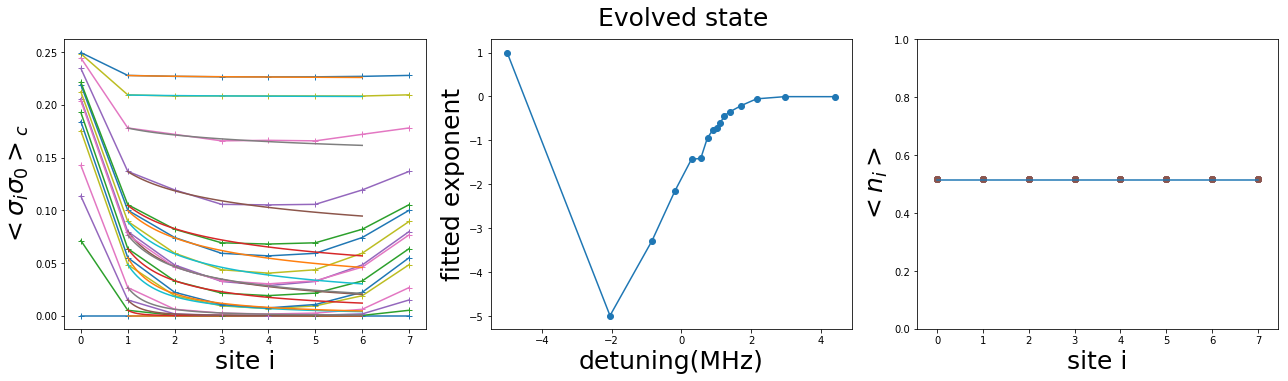

In [62]:
detuning_list = []
exponent_list = []
overlapping_list = []
fig,ax = plt.subplots(ncols=3,nrows=1,figsize=(18,5))
y_sim = []
#for it,t_id in enumerate(range(crit_id0-10,crit_id0+10,2)):
#for t_id in range(crit_id0-10,crit_id0+20,3):
for t_id in id_list:
    ax[0].plot(x,sigma2[t_id],label='Evolved state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+')
    print('detuning,', data[1][t_id])
    #ax[0].plot(x,sigma2[t_id],label='Evolved state'+str(np.round(data[1][t_id],4))+'MHz',marker = '+',color='C%d'%it)
    ax[2].scatter(np.arange(0,N),n)
    detuning_list.append(data[1,t_id])
    overlapping_list.append(data[5,t_id])
    # define the power law function
    fit_range = 5
    # define the data points
    xdata = np.arange(1,fit_range)
    ydata = sigma2[t_id,1:fit_range]
    y_sim.append(ydata)
    print(ydata)
    # fit the power law to the data
    params, params_covariance = curve_fit(power_law, xdata, ydata)
    # evaluate the fitted power law function and plot it
    xfit = np.linspace(1, fit_range+1, 100)
    yfit = power_law(xfit, params[0], params[1])
    yfit2 = power_law(xfit, params[0], -0.25)
    exponent_list.append(params[1])
   # ax[0].plot(xfit, yfit, '-',color='C%d'%it)
    ax[0].plot(xfit, yfit, '-')

    if t_id == crit_id0:
        print(data[1,t_id],params[1])
        ax[1].scatter(data[1,t_id],params[1],s=100,color = 'r',marker = '*',zorder = 2)
   # ax[0].plot(xfit, yfit2, 'g-',label = 'theoretical power law -0.25')
ax[1].plot(detuning_list,exponent_list,marker = 'o',zorder =1)

ax[1].set_xlabel('detuning(MHz)',fontsize = 25)
ax[1].set_ylabel('fitted exponent',fontsize = 25)

ax[0].set_xlabel('site i',fontsize = 25)
ax[0].set_ylabel('$<\sigma_i\sigma_0>_c$',fontsize = 25)
ax[2].plot(np.arange(0,N),n_g)
ax[2].set_ylim([0,1])
ax[2].set_xlabel('site i',fontsize = 25)
ax[2].set_ylabel('$<n_i>$',fontsize = 25)
# ax[0].set_xscale('log')
# ax[0].set_yscale('log')    
fig.tight_layout()
plt.suptitle('Evolved state',fontsize=25,x=0.53,y=1.05)    


In [63]:
y_sim

[array([-0.,  0., -0.,  0.]),
 array([ 5.05370044e-03,  1.55438962e-04,  5.12476525e-05, -3.87191434e-05]),
 array([ 1.48543075e-02,  1.60843838e-03,  3.03734895e-04, -4.24978269e-05]),
 array([0.02661093, 0.00600797, 0.00237351, 0.00149938]),
 array([0.04836264, 0.01887366, 0.00923223, 0.00661042]),
 array([0.05496583, 0.02212949, 0.01053263, 0.00733185]),
 array([0.06359116, 0.03287459, 0.02135408, 0.01897675]),
 array([0.07979458, 0.04808093, 0.03240302, 0.02849215]),
 array([0.07666418, 0.04602032, 0.03304094, 0.03014777]),
 array([0.08939095, 0.05921313, 0.04350835, 0.04029017]),
 array([0.09997717, 0.07410816, 0.05911758, 0.05668288]),
 array([0.10528337, 0.08195209, 0.06908465, 0.06790814]),
 array([0.13685889, 0.11926679, 0.10559748, 0.10508097]),
 array([0.17809884, 0.17204347, 0.16585001, 0.1663538 ]),
 array([0.20953756, 0.20841238, 0.20847691, 0.20850026]),
 array([0.22795965, 0.22705965, 0.22661874, 0.22657527])]

In [86]:
np.array([t,det]).T

array([[ 0.        , -5.        ],
       [ 0.26667   , -2.0073834 ],
       [ 0.53333   , -0.80204031],
       [ 0.8       , -0.15099244],
       [ 1.0667    ,  0.25665703],
       [ 1.3333    ,  0.53579117],
       [ 1.6       ,  0.73903984],
       [ 1.8667    ,  0.89359433],
       [ 2.1333    ,  1.01504116],
       [ 2.4       ,  1.11305568],
       [ 2.6667    ,  1.23885311],
       [ 2.9333    ,  1.42029353],
       [ 3.2       ,  1.68677411],
       [ 3.4667    ,  2.11617054],
       [ 3.7333    ,  2.92322244],
       [ 4.        ,  5.        ]])